In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


basic training of the data... nothing complicated.
I will import libraries when I need them :)


In [2]:
data  = pd.read_csv('../input/train.csv')
test  = pd.read_csv('../input/test.csv')

lets have a look at the data. Hmm looks a little complicated than the one I have learned at udemy. There's first time for handling anything and here's mine :)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)


looks can be deceiving... there are only 1460 rows of data but 81 columns ... may be after cleaning the data i want to use PCA for dimentionality reduction 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

lets see if we have any null values and missing data. I want to plot a heatmap for null values. Guess I need Seaborn let's import that and plot the data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


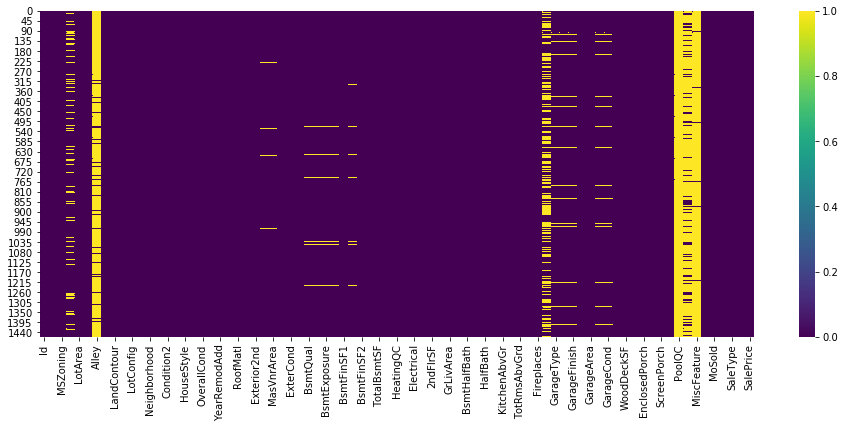

In [7]:
plt.figure(figsize = (16,6))
sns.heatmap(data.isnull(),cmap = 'viridis')

I want to fill all the null values with some meaningful information, And Id column for sure is not needed for data prediction so I am dropping Id column

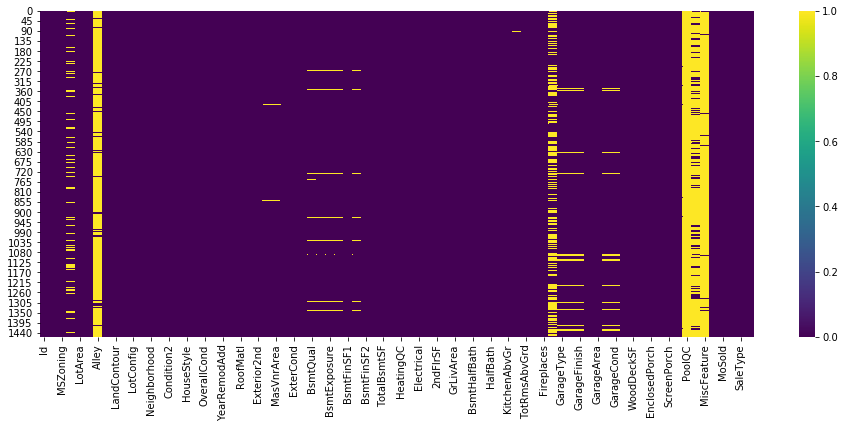

In [8]:
plt.figure(figsize = (16,6))
sns.heatmap(test.isnull(),cmap = 'viridis')


In [9]:
data.drop(['Id'], axis = 1,inplace = True)
data.shape
Id = test.Id
test.drop(['Id'], axis = 1,inplace = True)
test.shape

(1459, 79)

we have to predict Saleprice so I am creating X without Saleprice and y = Saleprice. Later I want to split my traing data using train test split 

In [10]:
X = data.drop(['SalePrice'],axis = 1)
y = data.SalePrice

I want to creatre a column AgeofHouse . and I want to delete YrSold, YrRemodeled and YearBuilt
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [11]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
AgeofHouse = X.YrSold - X.YearRemodAdd
AgeoftestHouse = test.YrSold -test.YearRemodAdd

In [13]:
X = pd.concat([X,AgeofHouse.rename('HouseAge')],axis = 1 )
test = pd.concat([test,AgeoftestHouse.rename('HouseAge')],axis = 1 )

In [14]:
X.drop(['YrSold','YearBuilt','YearRemodAdd'],axis = 1, inplace = True)
test.drop(['YrSold','YearBuilt','YearRemodAdd'],axis = 1, inplace = True)

Plotting correlation map for X

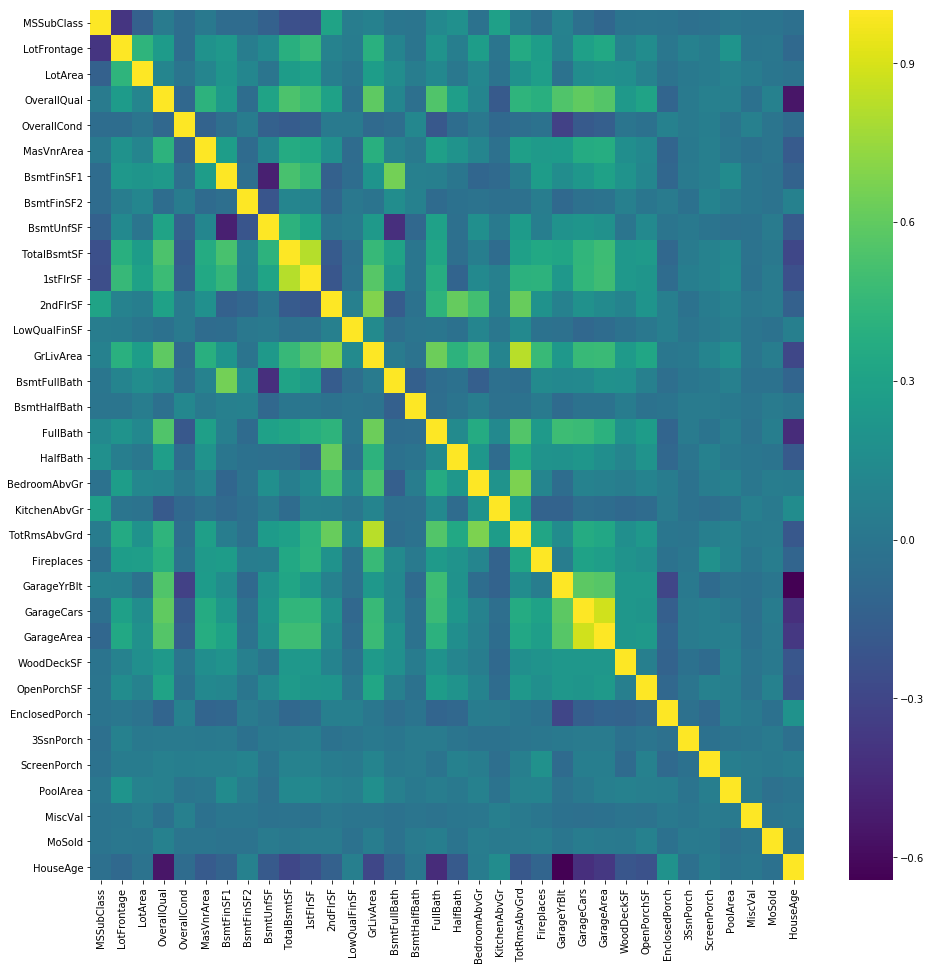

In [15]:
corr = X.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap='viridis')

Too Confusing but I see Dark blue for GarageYrBlt and HouseAge. I wanted to delete if the value is more that 0.95. Lets see 

In [16]:
X['GarageYrBlt'].corr(X['HouseAge'])

-0.6426524763486137

In [17]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

In [18]:
X.Fence = X.Fence.fillna('NoFence')
X.MiscFeature = X.MiscFeature.fillna('None')
test.Fence = test.Fence.fillna('NoFence')
test.MiscFeature = test.MiscFeature.fillna('None')

In [19]:
X.PoolQC = X.PoolQC.fillna('NoPool')# description says
test.PoolQC = test.PoolQC.fillna('NoPool')# description says

If we observe the above data I think the Garage Colmns with Nan has no garage, As othet Garage features are null too . So  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' Should be replaced with None

In [20]:
for col in ['GarageType', 'GarageCond','GarageFinish','GarageQual']:
    X[col] = X[col].fillna('none')
for col in ['GarageType', 'GarageCond','GarageFinish','GarageQual']:
    test[col] = test[col].fillna('none')

In [21]:

X['GarageYrBlt']=X['GarageYrBlt'].fillna(0)
test['GarageYrBlt']=test['GarageYrBlt'].fillna(0)

In [22]:
LF = X.LotFrontage.median()
X['LotFrontage'] = X['LotFrontage'].fillna(LF)
LFt =test.LotFrontage.median()
test['LotFrontage'] = test['LotFrontage'].fillna(LFt)

In [23]:
X['Alley'] = X['Alley'].fillna('none')
X['MasVnrType'] = X['MasVnrType'].fillna('none')
X['MasVnrArea'] = X['MasVnrArea'].fillna(0)
X['GarageCars'] = X['GarageCars'].fillna(0)
X['GarageArea'] = X['GarageArea'].fillna(0)
test['Alley'] = test['Alley'].fillna('none')
test['MasVnrType'] = test['MasVnrType'].fillna('none')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

In [24]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
    X[col] = X[col].fillna('none')
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']:
    test[col] = test[col].fillna('none')

In [25]:
X['Electrical'] = X['Electrical'].fillna('none')
X['FireplaceQu'] = X['FireplaceQu'].fillna('none')
test['Electrical'] = test['Electrical'].fillna('none')
test['FireplaceQu'] = test['FireplaceQu'].fillna('none')

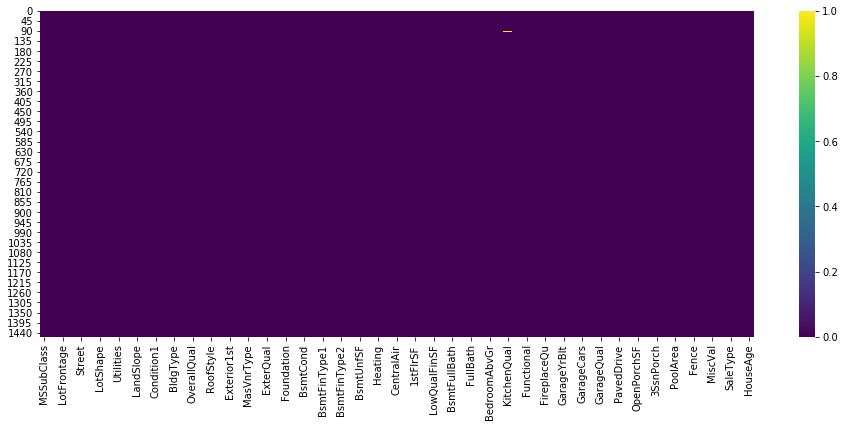

In [26]:
plt.figure(figsize = (16,6))
sns.heatmap(test.isnull(),cmap = 'viridis')

In [27]:
col_mask=test.isnull().any(axis=0)
col_mask

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea 

lets group all the columns where data type is Object and use label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

for now I will type all the object data type variables in a for loop and use Label Encodeing

In [29]:
cols = ('MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
        'LandSlope','Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
        'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
        'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition') 

In [30]:
for i in cols:
    
    LE = LabelEncoder() 
    LE.fit(list(X[i].values)) 
    X[i] = LE.transform(list(X[i].values))
   
for i in cols:
    
    LE = LabelEncoder() 
    LE.fit(list(test[i].values)) 
    test[i] = LE.transform(list(test[i].values))
test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,HouseAge
0,0,2,80.0,11622,1,2,3,3,0,4,0,12,1,2,0,2,5,6,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,1,0,6,8,4,49
1,0,3,81.0,14267,1,2,0,3,0,0,0,12,2,2,0,2,6,6,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,8,4,52
2,5,3,74.0,13830,1,2,0,3,0,4,0,8,2,2,0,4,5,5,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,1,0,3,8,4,12
3,5,3,78.0,9978,1,2,0,3,0,4,0,8,2,2,0,4,6,6,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,1,0,6,8,4,12
4,11,3,43.0,5005,1,2,0,1,0,4,0,22,2,2,4,2,8,5,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,1,0,1,8,4,18


In [31]:
from sklearn.linear_model import LinearRegression
L1 = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_tr,x_ts,y_tr,y_ts = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [32]:
L1.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
pre = L1.predict(x_ts)

In [34]:
metrics.r2_score(pre,y_ts)

0.8062552684031039

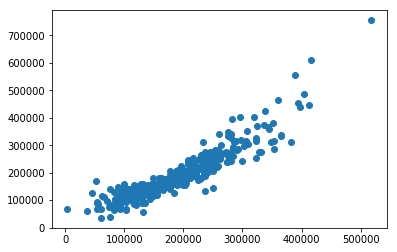

In [35]:
plt.scatter(pre,y_ts)

In [36]:
col_mask=test.isnull().any(axis=0)
col_mask

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea 

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
MasVnrType       1459 non-null int64
MasVnrArea       1459 non-null float64
E

In [38]:

col_mask=test.isnull().any(axis=0)
col_mask
test = test.fillna(0)



In [39]:
col_mask=test.isnull().any(axis=0)
col_mask

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea 

In [40]:
SalePrice = L1.predict(test)
#test.info()

In [41]:
predict_Sales=pd.Series(SalePrice, name = 'SalePrice')
result = pd.concat([Id, predict_Sales], axis=1)
result.to_csv('Housing_Pred.csv',index=False)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
